In [1]:
!pip install ultralytics opencv-python tqdm matplotlib -q

In [2]:
import os
import shutil
import yaml
import time
import random
from glob import glob
from tqdm import tqdm

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [3]:
!wget https://github.com/pvateekul/digitalhealth-ai2025/raw/main/dataset/poseCheck.zip
!unzip -q -o 'poseCheck.zip'

--2025-12-17 07:56:11--  https://github.com/pvateekul/digitalhealth-ai2025/raw/main/dataset/poseCheck.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/pvateekul/digitalhealth-ai2025/main/dataset/poseCheck.zip [following]
--2025-12-17 07:56:12--  https://media.githubusercontent.com/media/pvateekul/digitalhealth-ai2025/main/dataset/poseCheck.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12811822 (12M) [application/zip]
Saving to: ‘poseCheck.zip’

poseCheck.zip       100%[===================>]  12.22M  81.1MB/s    in 0.2s    

2025-12-17 07:56:12 (81.1 MB/s) - ‘poseCheck.zi

In [27]:
from ultralytics import YOLO
model = YOLO("best (1).pt")  # load a pretrained model (recommended for training)

In [3]:
# Train the model
results = model.train(data="data.yaml", epochs=2, imgsz=200, batch=32)

Ultralytics 8.3.239 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=2, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=200, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

In [33]:
metrics = model.val()

Ultralytics 8.3.239 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)


FileNotFoundError: '/kaggle/input/posture-keypoints-detection/data.yaml' does not exist

In [28]:
# Print mAP50-95 (OKS)
print(f"mAP50-95 (OKS): {metrics.pose.map}")

# Print mAP50 (OKS)
print(f"mAP50 (OKS): {metrics.pose.map50}")

mAP50-95 (OKS): 1.759301222056067e-05
mAP50 (OKS): 0.0001759301222056067


In [29]:
print("All metrics:", metrics.results_dict)

All metrics: {'metrics/precision(B)': 0.21882552138955513, 'metrics/recall(B)': 0.34, 'metrics/mAP50(B)': 0.1822883503615088, 'metrics/mAP50-95(B)': 0.055754578906940244, 'metrics/precision(P)': 0.0003313452617627568, 'metrics/recall(P)': 0.02, 'metrics/mAP50(P)': 0.0001759301222056067, 'metrics/mAP50-95(P)': 1.759301222056067e-05, 'fitness': 0.055772171919160805}


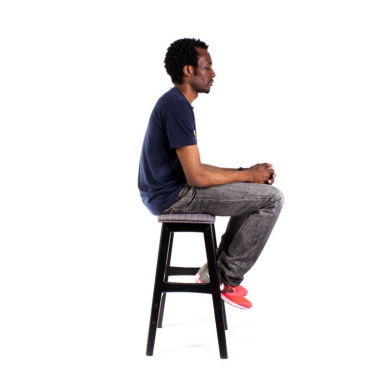

In [30]:
import matplotlib.pyplot as plt
import cv2
# 9. Load a sample test image and infer
test_img_path = 'images/val/barbar_3.jpg'
img = cv2.imread(test_img_path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display using matplotlib
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [31]:
results = model(img)


0: 640x640 1 person, 596.0ms
Speed: 5.9ms preprocess, 596.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


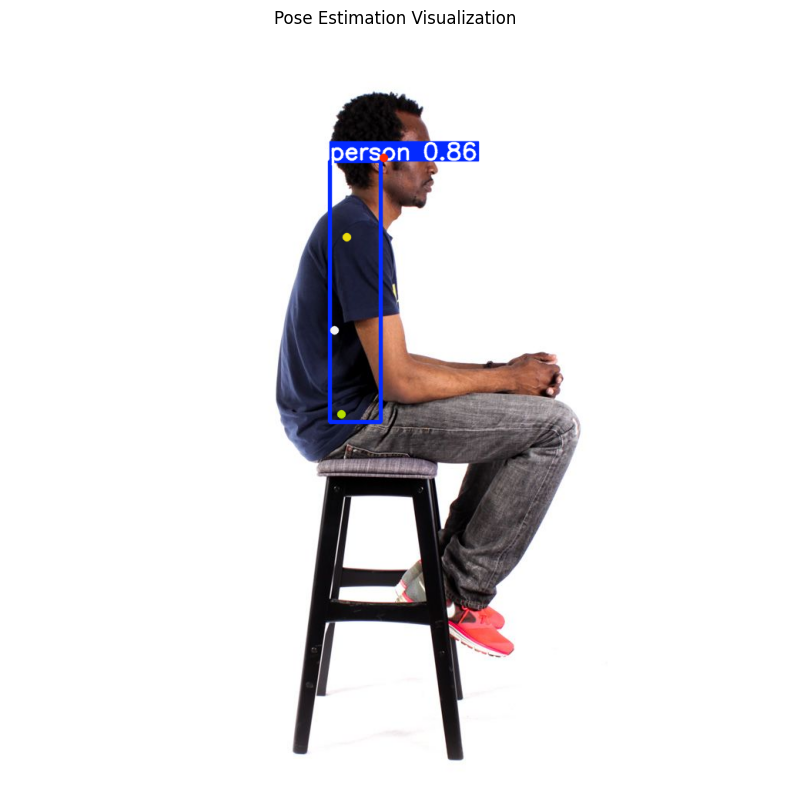

In [32]:
result = results[0]

# plot the pose estimation on the image and convert color for matplotlib
img_rgb = cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.title('Pose Estimation Visualization')
plt.axis('off')
plt.show()